In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
df=pd.read_csv('creditcard.csv')

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
## DATA VISUALIZATION

In [44]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [45]:
df.isna().any().any()

False

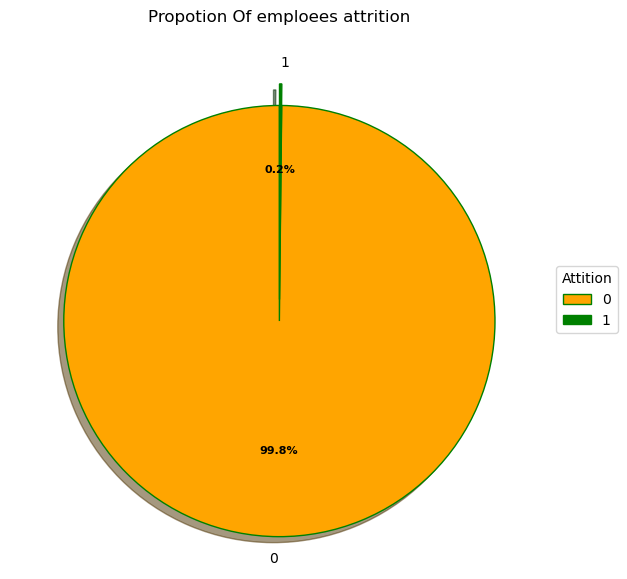

In [46]:
#EXPLORE DATA
att=df["Class"].value_counts(normalize=True)
explode = (0.1, 0.0, )
colors=("orange","green")
fig,ax=plt.subplots(figsize=(10,7))
#wedges argument
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(att,
                                  autopct = lambda pct: func(pct, att),
                                  explode = explode,
                                  labels = att.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, att.index,
          title ="Attition",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Propotion Of emploees attrition")
 
# show plot
plt.show()


<Axes: >

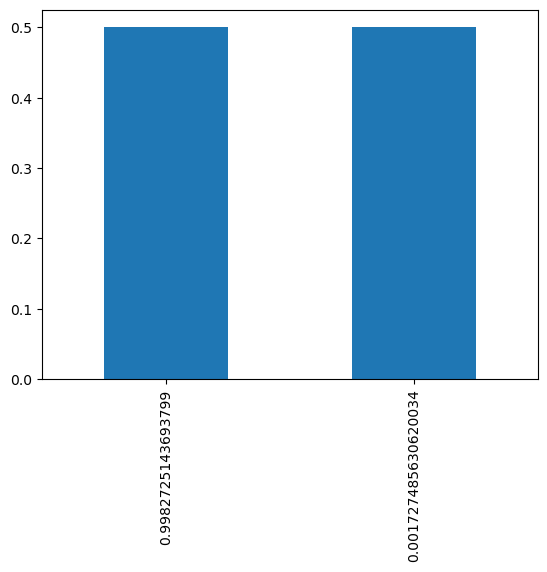

In [47]:
df['Class'].value_counts(normalize=True).value_counts(normalize=True).plot(kind='bar')

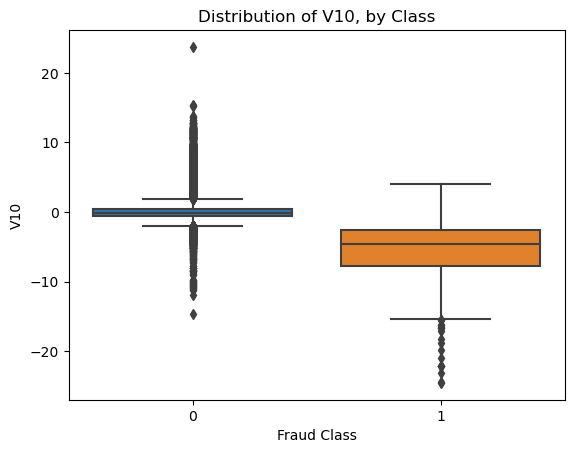

In [48]:
# Create boxplot
sns.boxplot(y='V10',x='Class',data=df)
plt.xlabel("Fraud Class")
plt.ylabel("V10")
plt.title("Distribution of V10, by Class");

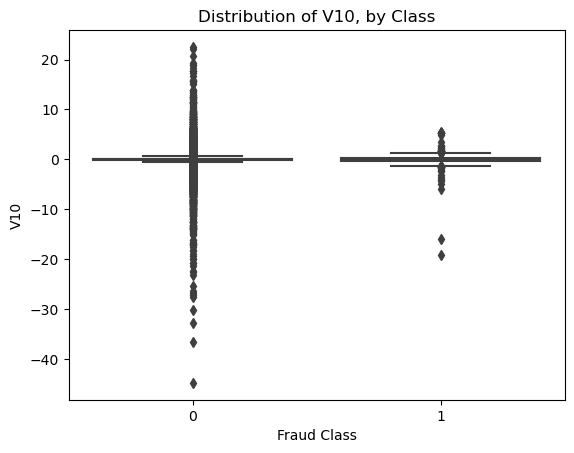

In [49]:
# Create boxplot
sns.boxplot(y='V23',x='Class',data=df)
plt.xlabel("Fraud Class")
plt.ylabel("V10")
plt.title("Distribution of V10, by Class");

<Axes: >

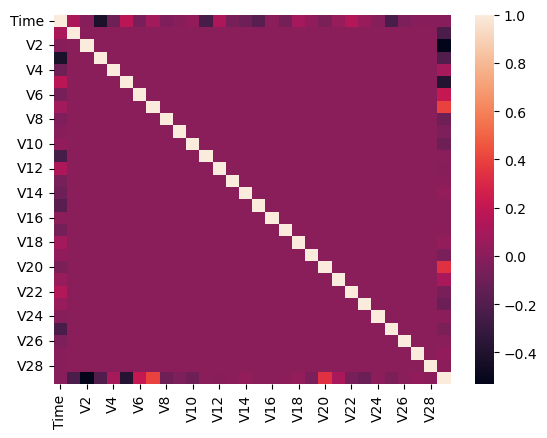

In [51]:
corr=df.drop(columns="Class").corr()
sns.heatmap(corr)

In [62]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[["Time","Amount"]].to_numpy())
df_scaled= pd.DataFrame(df_scaled, columns=['scaled_Time','scaled_Amount'])
df.drop(columns=["Time","Amount"],inplace=True)
df=pd.concat([df,df_scaled],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Time,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


In [68]:
#split
x=df.drop(columns=["Class"])
y=df["Class"]

In [74]:
x,y

(               V1         V2        V3        V4        V5        V6  \
 0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
 2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
 ...           ...        ...       ...       ...       ...       ...   
 284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
 284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
 284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
 284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
 284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   
 
               V7        V8        V9       V10  ...       V21       V22  \
 0       0.239599  0.098698  0.363787  0.09079

In [75]:
x.shape,y.shape

((284807, 30), (284807,))

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
x_train.shape,x_test.shape

((227845, 30), (56962, 30))

In [101]:
np.random.seed(42)
x_train_under=x_train[:1000]
y_train_under=y_train[:1000]
np.random.seed(42)
x_train_under,y_train_under=shuffle(x_train_under,y_train_under)
x_train_under.shape,y_train_under.shape

((1000, 30), (1000,))

In [116]:
x_dummy_train_split,x_dummy_test_split,y_dummy_train_split,y_dummy_test_split=train_test_split(x_train_under,y_train_under)
x_dummy_train_split.shape,x_dummy_test_split.shape,y_dummy_train_split.shape,y_dummy_test_split.shape

((750, 30), (250, 30), (750,), (250,))

In [105]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9983


In [110]:
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)
model

RandomForestClassifier(max_depth=3, random_state=42)

In [117]:
model.fit(x_dummy_train_split,y_dummy_train_split)

RandomForestClassifier(max_depth=3, random_state=42)

In [118]:
model.score(x_dummy_test_split,y_dummy_test_split)

0.996

In [119]:
model.score(x_dummy_train_split,y_dummy_train_split)

1.0

In [120]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [121]:
model.score(x_test,y_test)*100).round(2)

0.9991924440855307

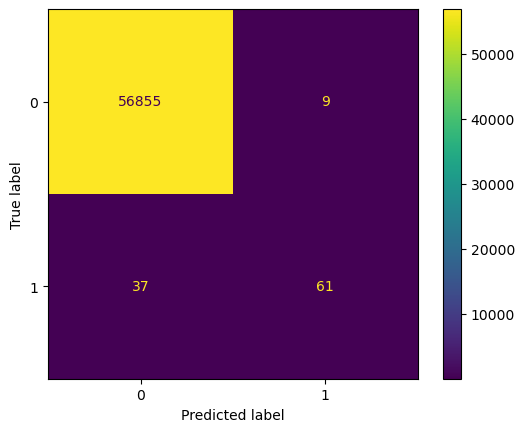

In [125]:
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)